<a href="https://colab.research.google.com/github/hvr2026/Hopping-Window-Crude-Oil-Prices/blob/main/Hopping_Window_Crude_Oil_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

In [2]:
# Load the dataset
file_path = '/content/DCOILWTICO.csv'  # Replace with the actual path
data = pd.read_csv(file_path)

In [3]:
# Convert DATE to datetime and DCOILWTICO to numeric, handling missing values
data['DATE'] = pd.to_datetime(data['DATE'])
data['DCOILWTICO'] = pd.to_numeric(data['DCOILWTICO'], errors='coerce')
data = data.dropna().sort_values(by='DATE')

print("Dataset loaded and preprocessed successfully.")

Dataset loaded and preprocessed successfully.


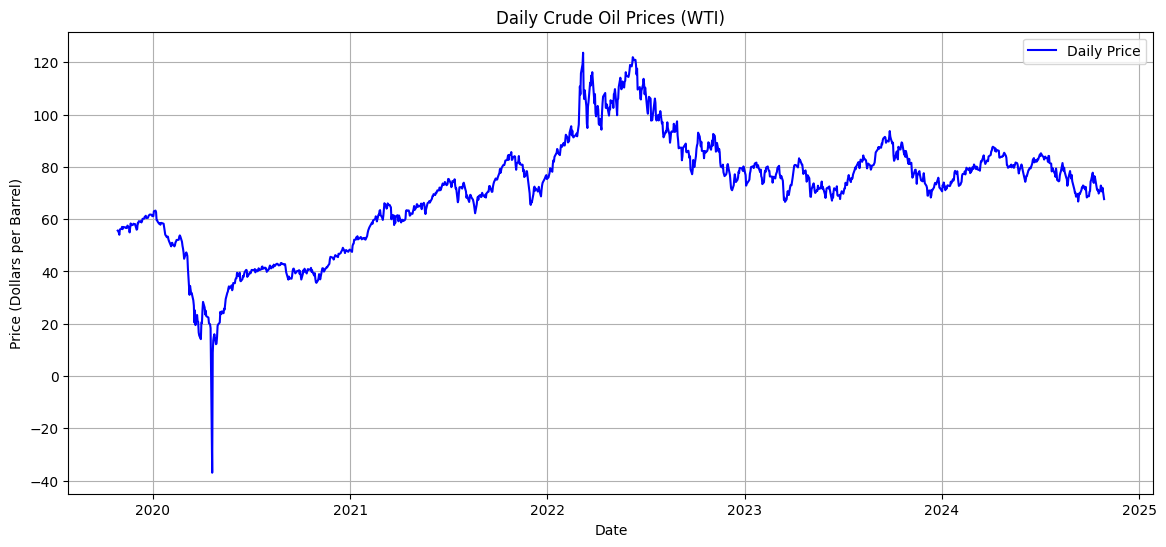

Daily crude oil prices plotted.


In [4]:
# Plot the daily crude oil prices
plt.figure(figsize=(14, 6))
plt.plot(data['DATE'], data['DCOILWTICO'], label='Daily Price', color='blue')
plt.title('Daily Crude Oil Prices (WTI)')
plt.xlabel('Date')
plt.ylabel('Price (Dollars per Barrel)')
plt.legend()
plt.grid()
plt.show()

print("Daily crude oil prices plotted.")


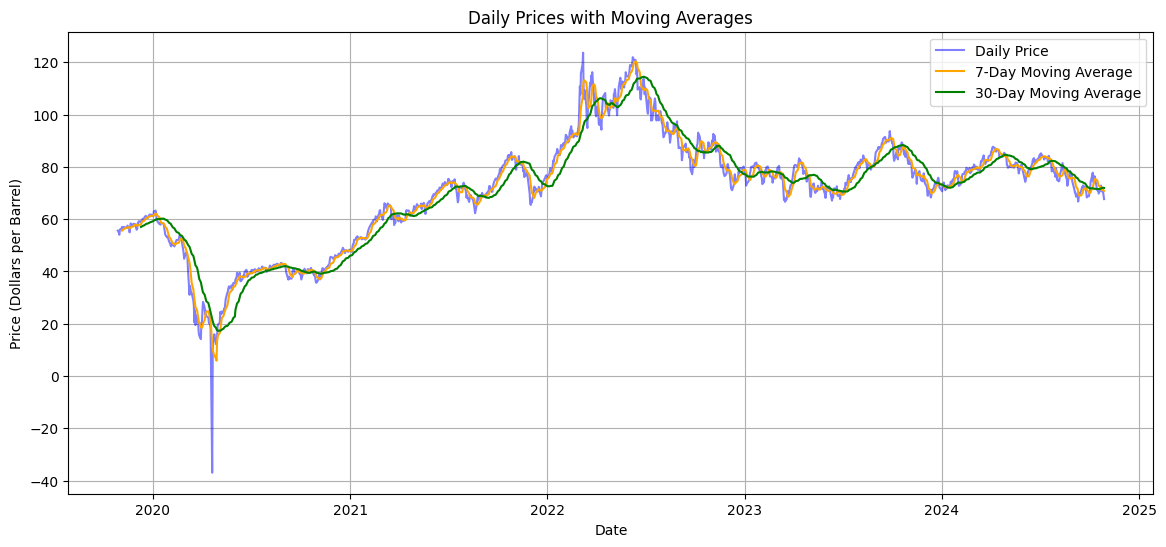

Moving averages calculated and plotted.


In [12]:
# Ensure 'DATE' column exists
if 'DATE' not in data.columns:
    data.reset_index(inplace=True)

# Calculate moving averages
data['7-Day MA'] = data['DCOILWTICO'].rolling(window=7).mean()
data['30-Day MA'] = data['DCOILWTICO'].rolling(window=30).mean()

# Plot the moving averages
plt.figure(figsize=(14, 6))
plt.plot(data['DATE'], data['DCOILWTICO'], label='Daily Price', color='blue', alpha=0.5)
plt.plot(data['DATE'], data['7-Day MA'], label='7-Day Moving Average', color='orange')
plt.plot(data['DATE'], data['30-Day MA'], label='30-Day Moving Average', color='green')
plt.title('Daily Prices with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (Dollars per Barrel)')
plt.legend()
plt.grid()
plt.show()

print("Moving averages calculated and plotted.")


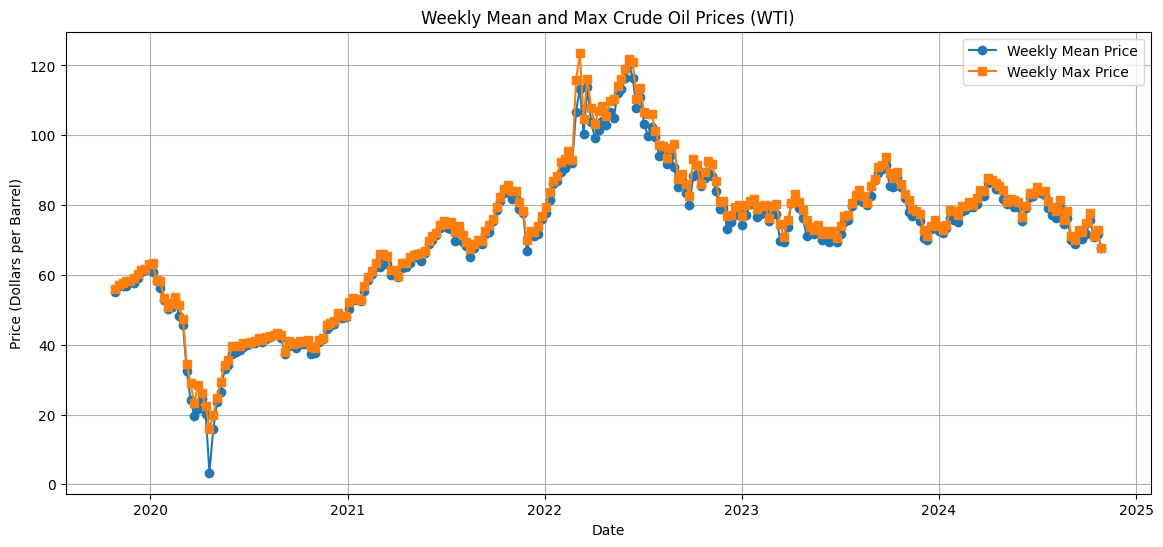

In [13]:
# Ensure 'DATE' column exists
if 'DATE' not in data.columns:
    data.reset_index(inplace=True)

# Set 'DATE' as index for resampling
data.set_index('DATE', inplace=True)

# Aggregate weekly data
weekly_data = data.resample('7D').agg(['mean', 'max'])

# Flatten column names
weekly_data.columns = ['_'.join(col).strip() for col in weekly_data.columns.values]

# Rename columns for better readability
weekly_data.rename(columns={'DCOILWTICO_mean': 'Mean Price', 'DCOILWTICO_max': 'Max Price'}, inplace=True)

# Reset index for plotting
weekly_data.reset_index(inplace=True)

# Plot weekly statistics
plt.figure(figsize=(14, 6))
plt.plot(weekly_data['DATE'], weekly_data['Mean Price'], label='Weekly Mean Price', marker='o')
plt.plot(weekly_data['DATE'], weekly_data['Max Price'], label='Weekly Max Price', marker='s')
plt.title('Weekly Mean and Max Crude Oil Prices (WTI)')
plt.xlabel('Date')
plt.ylabel('Price (Dollars per Barrel)')
plt.legend()
plt.grid()
plt.show()


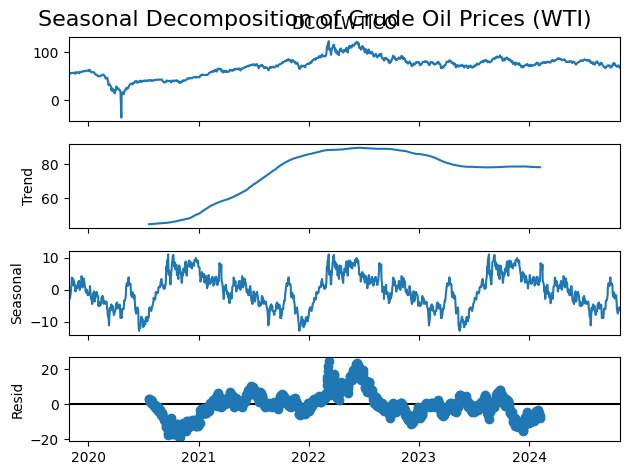

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(data['DCOILWTICO'], model='additive', period=365)
decomposition.plot()
plt.suptitle('Seasonal Decomposition of Crude Oil Prices (WTI)', fontsize=16)
plt.show()


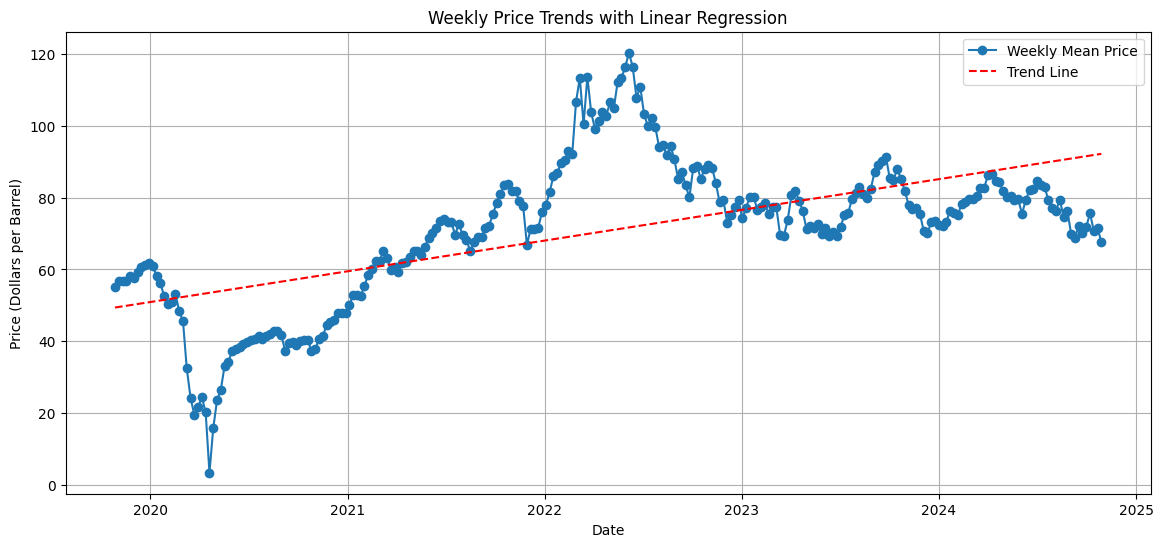

In [15]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Add numeric week counter
weekly_data['Week Number'] = np.arange(len(weekly_data))

# Perform linear regression on weekly mean prices
X = weekly_data[['Week Number']]
y = weekly_data['Mean Price']
model = LinearRegression()
model.fit(X, y)
trend_line = model.predict(X)

# Plot the trend
plt.figure(figsize=(14, 6))
plt.plot(weekly_data['DATE'], weekly_data['Mean Price'], label='Weekly Mean Price', marker='o')
plt.plot(weekly_data['DATE'], trend_line, label='Trend Line', color='red', linestyle='--')
plt.title('Weekly Price Trends with Linear Regression')
plt.xlabel('Date')
plt.ylabel('Price (Dollars per Barrel)')
plt.legend()
plt.grid()
plt.show()


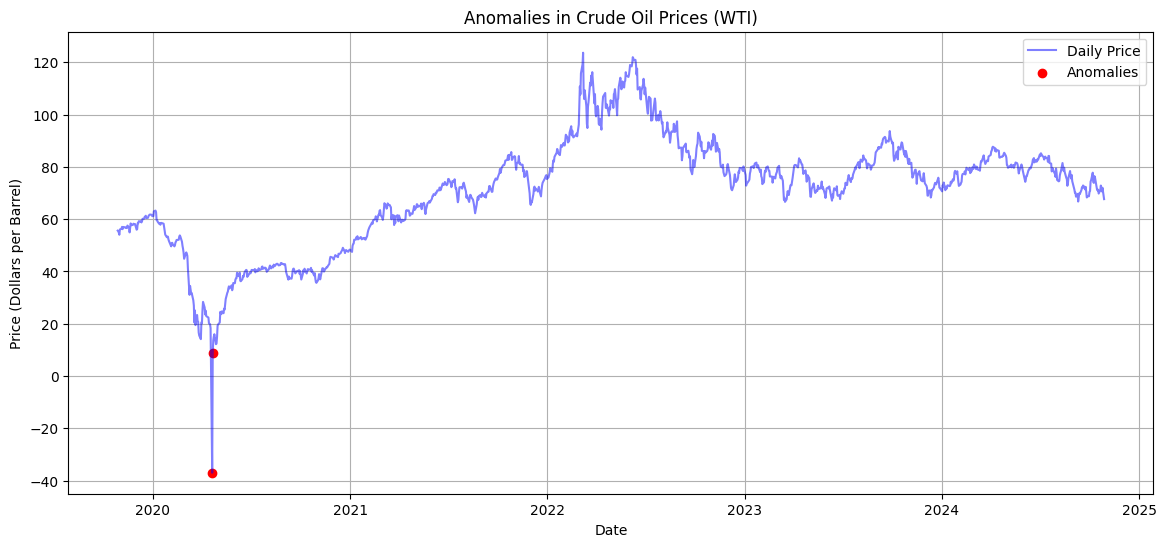

In [16]:
# Calculate Z-Score for anomaly detection
data['Z-Score'] = (data['DCOILWTICO'] - data['DCOILWTICO'].mean()) / data['DCOILWTICO'].std()
anomalies = data[data['Z-Score'].abs() > 3]

# Plot anomalies
plt.figure(figsize=(14, 6))
plt.plot(data.index, data['DCOILWTICO'], label='Daily Price', color='blue', alpha=0.5)
plt.scatter(anomalies.index, anomalies['DCOILWTICO'], color='red', label='Anomalies')
plt.title('Anomalies in Crude Oil Prices (WTI)')
plt.xlabel('Date')
plt.ylabel('Price (Dollars per Barrel)')
plt.legend()
plt.grid()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

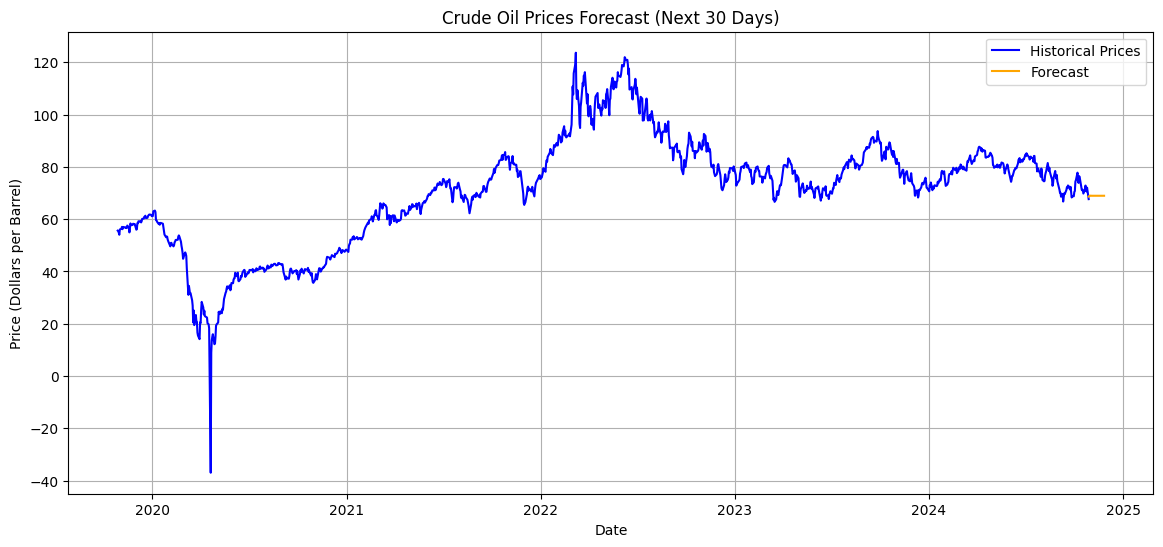

In [17]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
model = ARIMA(data['DCOILWTICO'], order=(5, 1, 0))
arima_result = model.fit()

# Forecast for the next 30 days
forecast = arima_result.forecast(steps=30)

# Plot the forecast
plt.figure(figsize=(14, 6))
plt.plot(data.index, data['DCOILWTICO'], label='Historical Prices', color='blue')
plt.plot(pd.date_range(data.index[-1], periods=30, freq='D'), forecast, label='Forecast', color='orange')
plt.title('Crude Oil Prices Forecast (Next 30 Days)')
plt.xlabel('Date')
plt.ylabel('Price (Dollars per Barrel)')
plt.legend()
plt.grid()
plt.show()


Dataset structure after loading:
           DCOILWTICO
DATE                 
2019-10-28       55.6
2019-10-29      55.34
2019-10-30      54.85
2019-10-31      54.02
2019-11-01      56.04


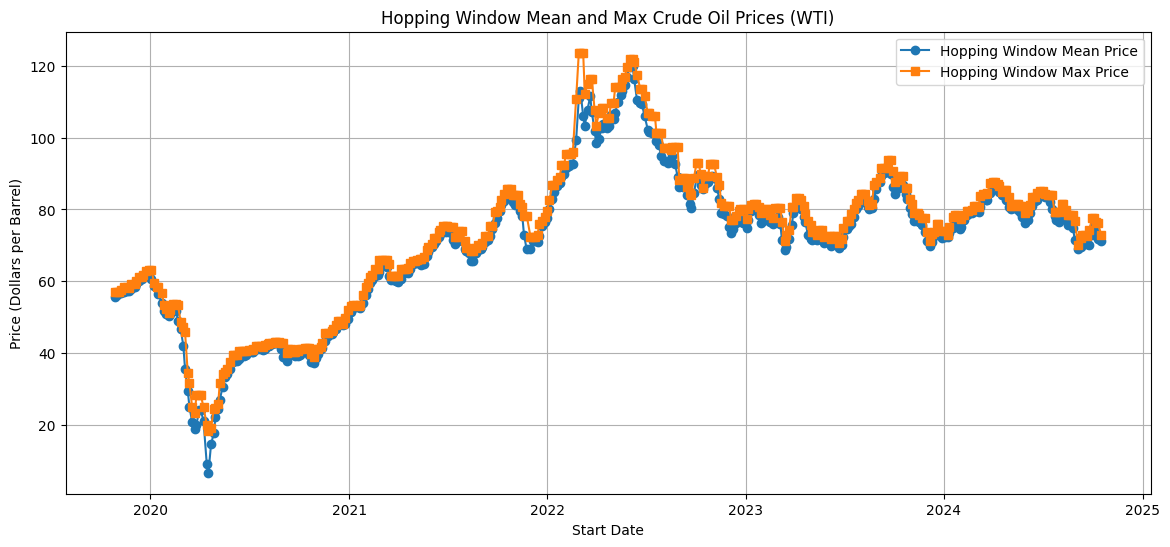

    Start Date  Mean Price  Max Price
0   2019-10-28   55.602857      57.04
1   2019-10-31   56.215714      57.04
2   2019-11-05   56.748571      57.04
3   2019-11-08   56.632857      57.54
4   2019-11-14   56.944286      58.36
..         ...         ...        ...
411 2024-09-30   73.025714      77.76
412 2024-10-03   75.385714      77.76
413 2024-10-08   73.447143      76.46
414 2024-10-11   71.905714      76.11
415 2024-10-17   71.287143      72.84

[416 rows x 3 columns]
Hopping Window results saved to '/content/hopping_window_results.csv'.


In [23]:
file_path = '/content/DCOILWTICO.csv'  # File path specified by you
data = pd.read_csv(file_path, index_col=0)  # Set the first column ('DATE') as the index directly

# Debugging: Check dataset structure
print("Dataset structure after loading:")
print(data.head())

# Ensure the index is in datetime format and 'DCOILWTICO' is numeric
data.index = pd.to_datetime(data.index, errors='coerce')  # Convert the index to datetime
data['DCOILWTICO'] = pd.to_numeric(data['DCOILWTICO'], errors='coerce')  # Ensure numeric values
data.dropna(inplace=True)  # Remove rows with missing or invalid data

# Define window size and hop size
window_size = 7  # 7 days
hop_size = 3     # 3 days

# Initialize lists to store results
hopping_means = []
hopping_maxs = []
window_start_dates = []

# Apply Hopping Window
for start in range(0, len(data) - window_size + 1, hop_size):
    window = data.iloc[start:start + window_size]
    hopping_means.append(window['DCOILWTICO'].mean())
    hopping_maxs.append(window['DCOILWTICO'].max())
    window_start_dates.append(window.index[0])  # Start date of the window

# Create a DataFrame for the Hopping Window results
hopping_window_results = pd.DataFrame({
    'Start Date': window_start_dates,
    'Mean Price': hopping_means,
    'Max Price': hopping_maxs
})

# Plot Hopping Window Metrics
plt.figure(figsize=(14, 6))
plt.plot(hopping_window_results['Start Date'], hopping_window_results['Mean Price'], label='Hopping Window Mean Price', marker='o')
plt.plot(hopping_window_results['Start Date'], hopping_window_results['Max Price'], label='Hopping Window Max Price', marker='s')
plt.title('Hopping Window Mean and Max Crude Oil Prices (WTI)')
plt.xlabel('Start Date')
plt.ylabel('Price (Dollars per Barrel)')
plt.legend()
plt.grid()
plt.show()

# Display the Hopping Window results
print(hopping_window_results)

# Save the results to a CSV file
hopping_window_results.to_csv("/content/hopping_window_results.csv", index=False)
print("Hopping Window results saved to '/content/hopping_window_results.csv'.")